In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Model performance load

### k-mers

In [2]:
k = pd.read_csv('../k-mers/output/performance_model_lycopersicum_kmers.csv')
k

,chr,corr,R^2,MSE
0,chr1,0.871434,0.722333,0.008403
1,chr2,0.813087,0.308118,0.009735
2,chr3,0.843979,0.685377,0.008982
3,chr4,0.808353,0.618949,0.011925
4,chr5,0.810285,0.643644,0.008321
5,chr6,0.756440,0.570843,0.010992
6,chr7,0.862562,0.676451,0.011748
7,chr8,0.858841,0.688144,0.009091
8,chr9,0.925904,0.726442,0.011624
9,chr10,0.606018,0.310545,0.051308


### Expression

In [3]:
e = pd.read_csv('../expression/output/performance_model_lycopersicum_expression.csv')
e

,chr,corr,R^2,MSE
0,chr1,0.760423,0.560505,0.013300
1,chr2,0.800863,0.135576,0.012163
2,chr3,0.744372,0.542843,0.013051
3,chr4,0.799635,0.593236,0.012730
4,chr5,0.776287,0.599397,0.009354
5,chr6,0.741869,0.496701,0.012891
6,chr7,0.830590,0.608486,0.014216
7,chr8,0.873179,0.699211,0.008779
8,chr9,0.897159,0.610130,0.016567
9,chr10,0.579008,0.265000,0.054697


### Transposons

In [5]:
t = pd.read_csv('../transposons/output/performance_model_lycopersicum_transposons.csv')
t

,chr,corr,R^2,MSE
0,chr1,0.876577,0.703472,0.008973
1,chr2,0.832410,0.458599,0.007618
2,chr3,0.866442,0.718450,0.008037
3,chr4,0.823417,0.632107,0.011513
4,chr5,0.813644,0.648231,0.008214
5,chr6,0.759952,0.573070,0.010935
6,chr7,0.877998,0.712168,0.010451
7,chr8,0.881976,0.738434,0.007634
8,chr9,0.925219,0.730381,0.011457
9,chr10,0.626596,0.328582,0.049965


###  All 

In [7]:
a = pd.read_csv('../all/output/performance_model_lycopersicum_all.csv')
a

,chr,corr,R^2,MSE
0,chr1,0.883086,0.724442,0.008339
1,chr2,0.823121,0.412624,0.008265
2,chr3,0.873242,0.732692,0.007631
3,chr4,0.827672,0.651673,0.010901
4,chr5,0.816751,0.653148,0.008099
5,chr6,0.757598,0.569802,0.011019
6,chr7,0.876740,0.713451,0.010405
7,chr8,0.887514,0.743555,0.007485
8,chr9,0.932043,0.752386,0.010522
9,chr10,0.636972,0.351564,0.048255


# Summary table

In [16]:
corr = pd.DataFrame({'corr':[k['corr'].mean().round(3), e['corr'].mean().round(3), t['corr'].mean().round(3), a['corr'].mean().round(3)]})
r2 = pd.DataFrame({'R^2':[k['R^2'].mean().round(3), e['R^2'].mean().round(3), t['R^2'].mean().round(3), a['R^2'].mean().round(3)]})
mse = pd.DataFrame({'MSE':[k['MSE'].mean().round(3), e['MSE'].mean().round(3), t['MSE'].mean().round(3), a['MSE'].mean().round(3)]})
label = pd.DataFrame({'Method': ['k-mers', 'Expression', 'Transposons', 'All']})

table = pd.concat([label, corr, r2, mse], axis=1)
table

,Method,corr,R^2,MSE
0,k-mers,0.829,0.606,0.015
1,Expression,0.794,0.521,0.018
2,Transposons,0.840,0.634,0.014
3,All,0.843,0.642,0.013


# Comparison plot

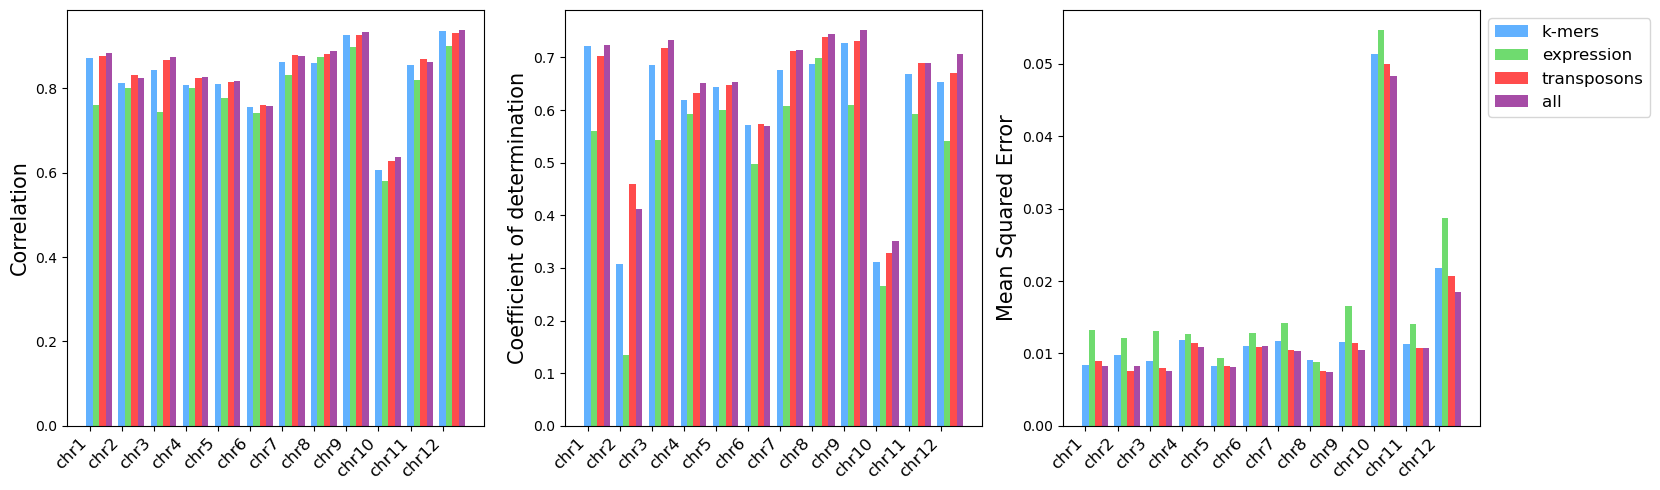

In [20]:
# Adjusting bar width
bar_width = 0.2

# Creating data positions
bar_positions_k = np.arange(len(k['chr']))
bar_positions_e = bar_positions_k + bar_width
bar_positions_t = bar_positions_e + bar_width
bar_positions_a = bar_positions_t + bar_width


# Creating subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# First chart
axs[0].bar(bar_positions_k, k['corr'], color='dodgerblue', width=bar_width, label='k-mers', alpha=0.7)
axs[0].bar(bar_positions_e, e['corr'], color='limegreen', width=bar_width, label='expression', alpha=0.7)
axs[0].bar(bar_positions_t, t['corr'], color='red', width=bar_width, label='transposons', alpha=0.7)
axs[0].bar(bar_positions_a, a['corr'], color='purple', width=bar_width, label='all', alpha=0.7)

axs[0].set_ylabel('Correlation', fontsize=15)

# Second chart
axs[1].bar(bar_positions_k, k['R^2'], color='dodgerblue', width=bar_width, label='k-mers', alpha=0.7)
axs[1].bar(bar_positions_e, e['R^2'], color='limegreen', width=bar_width, label='expression', alpha=0.7)
axs[1].bar(bar_positions_t, t['R^2'], color='red', width=bar_width, label='transposons', alpha=0.7)
axs[1].bar(bar_positions_a, a['R^2'], color='purple', width=bar_width, label='all', alpha=0.7)

axs[1].set_ylabel('Coefficient of determination', fontsize=15)

# Third chart
axs[2].bar(bar_positions_k, k['MSE'], color='dodgerblue', width=bar_width, label='k-mers', alpha=0.7)
axs[2].bar(bar_positions_e, e['MSE'], color='limegreen', width=bar_width, label='expression', alpha=0.7)
axs[2].bar(bar_positions_t, t['MSE'], color='red', width=bar_width, label='transposons', alpha=0.7)
axs[2].bar(bar_positions_a, a['MSE'], color='purple', width=bar_width, label='all', alpha=0.7)

axs[2].set_ylabel('Mean Squared Error', fontsize=15)

# Get chromosome labels from the 'chr' column
chr_labels = k['chr']

# Set x-axis labels for all three subplots
for ax in axs:
    ax.set_xticks(bar_positions_k)
    ax.set_xticklabels(chr_labels)

# Rotate labels for better readability
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Adjusting layout
plt.tight_layout()

# Place legend outside the subplots and above the last subplot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Show the figure
plt.show()